In [32]:
using Plots
using BenchmarkTools

In [54]:
include("derivs.jl")

D4x_SBP_ts (generic function with 1 method)

In [34]:
Qd[2,1]

-0.5

## SBP Test

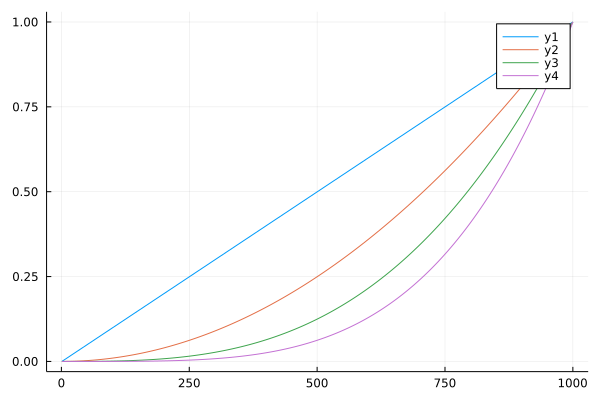

In [44]:
N = 1000
L = 1
dx = L/(N-1)
dv = zeros(N)

par_Dx = (N, dx, dv)

x = [dx*(i-1) for i in 1:N]
x2 = [dx^2*(i-1)^2 for i in 1:N]
x3 = [dx^3*(i-1)^3 for i in 1:N]
x4 = [dx^4*(i-1)^4 for i in 1:N]

plot(x)
plot!(x2)
plot!(x3)
plot!(x4)

In [45]:
d1 = D4x_SBP(x,par_Dx,Qd) .- 1.
d1'*d1/N

1.0775470063510182e-27

In [46]:
d2 = D4x_SBP(x2,par_Dx,Qd)  - 2*x
d2'*d2/N

5.1457890489591955e-28

In [48]:
d3 = D4x_SBP(x3,par_Dx,Qd)  - 3*x2
d3'*d3/N

1.4983524817576455e-14

In [49]:
d4 = D4x_SBP(x4,par_Dx,Qd)  - 4*x3
d4'*d4/N

1.1964610381825134e-13

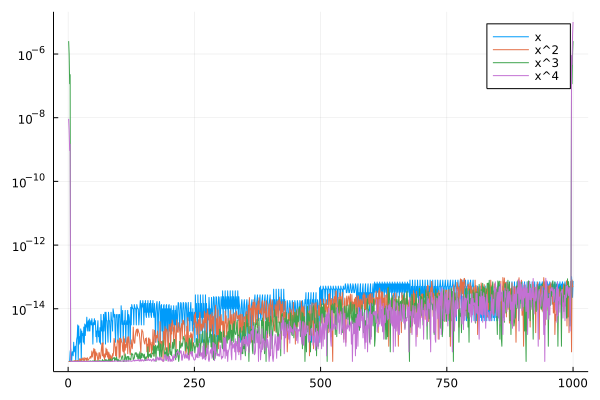

In [50]:
plot(abs.(d1).+eps(1.), yscale=:log10, label="x")
plot!(abs.(d2).+eps(1.), label="x^2")
plot!(abs.(d3).+eps(1.), label="x^3")
plot!(abs.(d4).+eps(1.), label="x^4")

In [52]:
par_Dx_st = N, dx
@btime D2x_SBP_ts(x4,par_Dx_st);

  2.026 μs (2 allocations: 15.88 KiB)


In [53]:
@btime D2x_SBP(x4,par_Dx);

  1.651 μs (1 allocation: 7.94 KiB)


In [57]:
D2x_SBP_ts(x4,par_Dx_st) - D2x_SBP(x4,par_Dx)

1000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

### Periodic Test

In [59]:
N = 100
L = 1
dx = L/N # periodic
dv = zeros(N)

par_Dx = (N, dx, dv)
par_Dx_ts = (N, dx)


xp = [dx*(i-1) for i in 1:N];




100-element Vector{Float64}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 ⋮
 0.91
 0.92
 0.93
 0.9400000000000001
 0.9500000000000001
 0.96
 0.97
 0.98
 0.99

In [60]:
m = 3
e2 = D4x_Per(sin.(2*π*m*xp),par_Dx) - 2*π*m* cos.(2*π*m*xp)

100-element Vector{Float64}:
 -0.0007898548534832628
 -0.0007758643524589104
 -0.0007343884699935188
 -0.0006668965098519664
 -0.0005757794083809387
 -0.00046426503430474497
 -0.00033630383994420754
 -0.0001964289143785436
 -4.9595396593327123e-5
  9.899506283161941e-5
  ⋮
  9.899506284893889e-5
 -4.9595396640178535e-5
 -0.00019642891431459475
 -0.0003363038399299967
 -0.00046426503437935196
 -0.0005757794084555456
 -0.0006668965099692059
 -0.0007343884698904901
 -0.0007758643523381181

In [61]:
D4x_Per(sin.(2*π*m*xp),par_Dx) - D4x_Per_ts(sin.(2*π*m*xp),par_Dx_ts)

100-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0